# Title: Generating a convex hull with the Divide-And-Conquer (DAC) algorithm
## Objective: helping students gain a deeper understanding of the DAC algorithm

## Instructions:
* Generate a set of 30 points randomly distributed in a two-dimensional plane
     –Make sure that no two points have same x coordinate, no two points have same y coordinate, and no three points are in a line
* Implement the DAC algorithm with your proposed approach
* Generate a convex hull and visualize it
* Write a short-version report
* Submit a simulation code (e.g., Python) you developed for this assignment

# User-Defined Functions

## intersection_calculator(point1, point2, c_divider)

In [1]:
"""
intersection calculator is a user-defined function which returns the y-coordinate of the 
intersect between the line connecting point1 and point2 and a vertical line, c_divider

point1: 2d-numpy array containing the x and y coordinates of the first point
point2: 2d-numpy array containing the x and y coordinates of the second point
c_divider: x coordinate of the vertical line between point1 and point2; float type. 
"""
def intersection_calculator(point1, point2, c_divider):
    x_1, y_1 = point1[0], point1[1]
    x_2, y_2 = point2[0], point2[1]

    gradient = (y_2 - y_1) / (x_2 - x_1 + 0.000001)
    
    return gradient * (c_divider - x_1) + y_1

## FindUpperVertices(sample1, sample2)

In [2]:
"""

FindUpperVertices is a user-defined function which returns the upper 2 indices that form the 
new convex hull from two convex hulls (i.e., sample1, sample2)

Note to the user: Vertex and index are used are used almost interchangeably in this code

"""

def FindUpperVertices(sample1, sample2):
    
    """
    center_index1: index of a point in the LHS convex hull that is closest to the c_divider
    center_index2: index of a point in the RHS convex hull that is closest to the c_divider

    Arr1_index: vertex of exploration in the LHS convex
    Arr2_index: vertex of exploration in the RHS convex

    Arr1_update: Boolean variable which indicates whether the vertex of the LHS convex hull
                 had been previously updated or not
    Arr2_update: Boolean variable which indicates whether the vertex of the RHS convex hull 
                 had been previously updated or not

    c_divider: x_coordinate of the vertical line placed in between two convex hulls

    intersection: y_coordinate of the intersection point between the c_divider line and the 
                 line which connects two vertex of different convex hulls. 

    intersection_calculator(point1, point2, c_divider): calculates the intersection point
    """
    #find the rightmost point of the LHS convex hull
    rightmost = sorted(sample1, key = lambda x: x[0])[-1]
    #find the leftmost point the RHS convex hull
    leftmost = sorted(sample2, key = lambda x: x[0])[0]
    
    #find the index of the rightmost point in the LHS convex hull
    for i in range(len(sample1)):
        if (sample1[i] == rightmost).all():
            Upper_Arr1_idx = i
            break
            
    #find the index of the leftmost point in the RHS convex hull
    for j in range(len(sample2)):
        if (sample2[j] == leftmost).all():
            Upper_Arr2_idx = j
            break
            
    #initialize Arr1_update, Arr2_update
    Arr1_update = True
    Arr2_update = True

    #calculate c divider
    c_divider = ((rightmost+leftmost)/2)[0]

    #calculate initial intersection between c_divider and rightmost and leftmost points
    intersection = intersection_calculator(sample1[Upper_Arr1_idx],
                                           sample2[Upper_Arr2_idx],
                                           c_divider = c_divider)

    #Iterate while vertex had been previously updated
    while Arr1_update == True or Arr2_update == True:

        #check each vertex of the LHS convex hull anticlockwise
        Upper_Arr1_idx -= 1
        Upper_Arr1_idx %= len(sample1)
        
        #calculate new intersection
        new_intersection = intersection_calculator(sample1[Upper_Arr1_idx],
                                                   sample2[Upper_Arr2_idx],
                                                   c_divider = c_divider)

        #if new_intersection is smaller than the current intersection, return to the previous vertex
        if new_intersection <= intersection:
            Upper_Arr1_idx += 1
            Upper_Arr1_idx %= len(sample1)
            #No update of vertex
            Arr1_update = False
        #if new_intersection is greater than the current intersection, update the vertex value
        else:
            intersection = new_intersection
            #update of vertex
            Arr1_update = True

    #-------------------------------------------------------------------------------------------------

        #check each vertex of the RHS convex hull clockwise
        Upper_Arr2_idx += 1
        Upper_Arr2_idx %= len(sample2)

        #calculate new intersection
        new_intersection = intersection_calculator(sample1[Upper_Arr1_idx],
                                                   sample2[Upper_Arr2_idx],
                                                   c_divider = c_divider)

        #if new_intersection is smaller than the current intersection, return to the previous vertex
        if new_intersection <= intersection:
            Upper_Arr2_idx -= 1
            Upper_Arr2_idx %= len(sample2)
            #No update of vertex
            Arr2_update = False
        #if new_intersection is greater than the current intersection, update the vertex value
        else:
            intersection = new_intersection
            #update of vertex
            Arr2_update = True

    return Upper_Arr1_idx, Upper_Arr2_idx

## FindLowerVertices(sample1, sample2)

In [3]:
"""

FindUpperVertices is a user-defined function which returns the lower 2 indices that form the 
new convex hull from two convex hulls (i.e., sample1, sample2)

Note to the user: Vertex and index are used are used almost interchangeably in this code

"""

def FindLowerVertices(sample1, sample2):
    
    """
    center_index1: index of a point in the LHS convex hull that is closest to the c_divider
    center_index2: index of a point in the RHS convex hull that is closest to the c_divider
    
    Arr1_index: vertex of exploration in the LHS convex
    Arr2_index: vertex of exploration in the RHS convex
    
    Arr1_update: Boolean variable which indicates whether the vertex of the LHS convex hull
                 had been previously updated or not
    Arr2_update: Boolean variable which indicates whether the vertex of the RHS convex hull 
                 had been previously updated or not
                 
    c_divider: x_coordinate of the vertical line placed in between two convex hulls
    
    intersection: y_coordinate of the intersection point between the c_divider line and the 
                 line which connects two vertex of different convex hulls. 
                 
    intersection_calculator(point1, point2, c_divider): calculates the intersection point
    
    """
    
    #find the rightmost point of the LHS convex hull
    rightmost = sorted(sample1, key = lambda x: x[0])[-1]
    #find the leftmost point the RHS convex hull
    leftmost = sorted(sample2, key = lambda x: x[0])[0]

    #find the index of the rightmost point in the LHS convex hull    
    for i in range(len(sample1)):
        if (sample1[i] == rightmost).all():
            Lower_Arr1_idx = i
            break
    
    #find the index of the leftmost point in the RHS convex hull
    for j in range(len(sample2)):
        if (sample2[j] == leftmost).all():
            Lower_Arr2_idx = j
            break

    #initialize Arr1_update and Arr2_update
    Arr1_update = True
    Arr2_update = True

    #calculate the c_divider
    c_divider = ((rightmost+leftmost)/2)[0]
    
    #calculate the intersection between c_divider and rightmost and leftmost points
    intersection = intersection_calculator(sample1[Lower_Arr1_idx],
                                           sample2[Lower_Arr2_idx],
                                           c_divider = c_divider)

    #iterate while vertex had been previously updated
    while Arr1_update == True or Arr2_update == True:
        
        #check each vertex of the LHS convex hull clockwise
        Lower_Arr1_idx += 1
        Lower_Arr1_idx %= len(sample1)
    
        #calculate new_intersection
        new_intersection = intersection_calculator(sample1[Lower_Arr1_idx],
                                                   sample2[Lower_Arr2_idx],
                                                   c_divider = c_divider)

        #if new_intersection is greater than the current intersection, return to the previous vertex
        if new_intersection >= intersection:
            Lower_Arr1_idx -= 1
            Lower_Arr1_idx %= len(sample1)
            #No update of vertex
            Arr1_update = False
        #if new_intersection is greater than the current intersection, update the vertex value
        else:
            intersection = new_intersection
            #update of vertex
            Arr1_update = True

    #-------------------------------------------------------------------------------------------------

        #check each vertex of the RHS convex hull anticlockwise
        Lower_Arr2_idx -= 1
        Lower_Arr2_idx %= len(sample2)

        #calculate new intersection
        new_intersection = intersection_calculator(sample1[Lower_Arr1_idx],
                                                   sample2[Lower_Arr2_idx],
                                                   c_divider = c_divider)


        #if new_intersection is greater than the current intersection, return to the previous vertex
        if new_intersection >= intersection:
            Lower_Arr2_idx += 1
            Lower_Arr2_idx %= len(sample2)
            #No update of vertex
            Arr2_update = False
        #if new_intersection is greater than the current intersection, update the vertex value
        else:
            intersection = new_intersection
            #update of vertex
            Arr2_update = True

    return Lower_Arr1_idx, Lower_Arr2_idx

## NewConvexHull(sample1, sample2, Upper_Arr1_idx, Upper_Arr2_idx, Lower_Arr1_idx, Lower_Arr2_idx)

In [4]:
"""

the NewConvexHull function returns the sequence of points which represents the 
convex hull of two set of points which are individually a smaller convex hull

sample1: coordinates of the first convex hull
sample2: coordinates of the second convex hull

Upper_Arr1_idx: index of the LHS convex hull point which connects with the RHS convex hull; 
                placed relatively above the other LHS convex hull which connects with the RHS 
                convex hull
                
Upper_Arr2_idx: index of the RHS convex hull point which connects with the LHS convex hull;
                placed relatively above the other RHS convex hull which connects with the LHS
                convex hull

Lower_Arr1_idx: index of the LHS convex hull point which connects with the RHS convex hull; 
                placed relatively below the other LHS convex hull which connects with the RHS 
                convex hull
                
Upper_Arr2_idx: index of the RHS convex hull point which connects with the LHS convex hull;
                placed relatively below the other RHS convex hull which connects with the LHS
                convex hull

"""
def NewConvexHull(sample1, sample2, Upper_Arr1_idx, Upper_Arr2_idx, Lower_Arr1_idx, Lower_Arr2_idx):
    
    #append the upper point of the LHS convex hull which connects with the RHS convex hull
    New_Convex_Hull = np.array([sample1[Upper_Arr1_idx]])
    #append the upper point of the RHS convex hull which connects with the LHS convex hull
    New_Convex_Hull = np.append(New_Convex_Hull, [sample2[Upper_Arr2_idx]], axis = 0)
    
    #iterate while Upper_Arr2_idx (now moving index) does not equal Lower_Arr2_idx
    while Upper_Arr2_idx != Lower_Arr2_idx:
        Upper_Arr2_idx += 1
        Upper_Arr2_idx %= len(sample2)
        #append points of the RHS convex hull between Upper_Arr2_idx and Lower_Arr2_idx in clockwise manner
        #(inclusive of Lower_Arr2_idx)
        New_Convex_Hull = np.append(New_Convex_Hull, [sample2[Upper_Arr2_idx]], axis = 0)
    
    #append the lower point of the LHS convex hull which connects with the RHS convex hull
    New_Convex_Hull = np.append(New_Convex_Hull, [sample1[Lower_Arr1_idx]], axis = 0) 
    
    #iterate while Lower_Arr1_idx (now moving index) does not equal Upper_Arr1_idx
    while Lower_Arr1_idx != Upper_Arr1_idx:
        Lower_Arr1_idx += 1
        Lower_Arr1_idx %= len(sample1)
        #append points between Lower_Arr1_idx and Upper_Arr1_idx in clockwise manner
        #(inclusive of Upper_Arr2_idx)
        New_Convex_Hull = np.append(New_Convex_Hull, [sample1[Lower_Arr1_idx]], axis = 0)
    
    #delete the last point
    New_Convex_Hull = New_Convex_Hull[:-1]

    return New_Convex_Hull

## TwoFingerMethod(sample1, sample2)

In [5]:
"""

TwoFingerMethod: compilation of the FindUpperVertices, FindLowerVertices, and NewConvexHull 
                given two convex hulls, it will return a new convex hull convex of the two 
                inputs

"""
def TwoFingerMethod(sample1, sample2):
    
    #Find the upper vertices which connects LHS convex hull and the RHS convex hull
    Upper_Arr1_idx, Upper_Arr2_idx = FindUpperVertices(sample1, sample2)
    
    #Find the lower vertices which connects LHS convex hull and the RHS convex hull
    Lower_Arr1_idx, Lower_Arr2_idx = FindLowerVertices(sample1, sample2)
    
    #generate the new convex hull
    New_Convex_Hull = NewConvexHull(sample1, sample2, 
                                    Upper_Arr1_idx, Upper_Arr2_idx,
                                    Lower_Arr1_idx, Lower_Arr2_idx)
    
    return New_Convex_Hull

## FindConvexHull(sample)

In [6]:
"""
FindConvexHull: given a set of points containing its x,y coordinates, it will return a sequence of points
                which represents the coordinates of the convex hull. 
                
                Note: when visualizing the new convex hull using matplotlib, append the first point to 
                the end

"""
def FindConvexHull(sample):
    if len(sample) > 3:
        return TwoFingerMethod(FindConvexHull(sample[0:len(sample)//2]), 
                               FindConvexHull(sample[len(sample)//2:]))
    else: 
        return TwoFingerMethod(sample[0:len(sample)//2], sample[len(sample)//2:])

# Implementation

## Import Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import random
import os

## Generate a set of 30 points randomly distributed in a 2-D plane

In [37]:
#set random seed
np.random.seed(316)

#number of samples
num = 30

#generate random samples with x,y coordinates
sample_np = np.random.uniform(0.0, 10.0, (num, 2))

#sort samples with respect to the x coordinates in ascending order
sorted_sample_np = sorted(sample_np, key = lambda x : x[0])
sorted_sample_np = np.array([list(i) for i in sorted_sample_np])

## Find Convex Hull

In [38]:
#find convex hull
Complete_Convex_Hull = FindConvexHull(sorted_sample_np)

#append the first element of the list to the end for visualization
Complete_Convex_Hull = np.append(Complete_Convex_Hull, [Complete_Convex_Hull[0]], axis = 0)

## Visualization

In [39]:
#set directory
save_folder = './images/'

#check if the directory already exists
if os.path.exists(save_folder):
    #if the directory exists, delete 
    shutil.rmtree(save_folder)
#create directory
os.makedirs(save_folder)

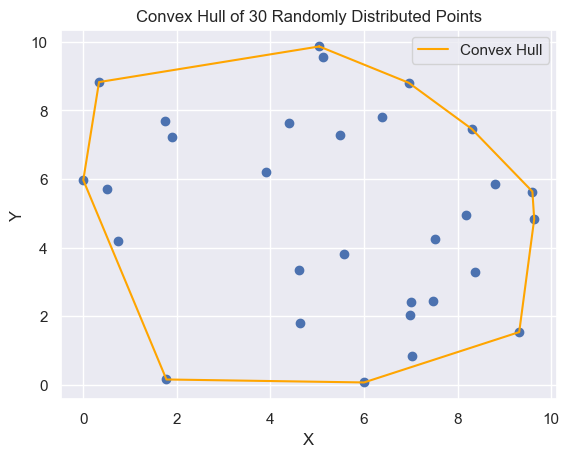

In [41]:
#plot the convex hull
plt.plot(Complete_Convex_Hull[:,0],Complete_Convex_Hull[:,1], color = 'orange', label = 'Convex Hull')
#plot the sample points
plt.scatter(sorted_sample_np[:,0], sorted_sample_np[:,1])
plt.title('Convex Hull of {} Randomly Distributed Points'.format(num))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.savefig('./images/Convex Hull of {} Randomly Distributed Points'.format(num), dpi = 200)
plt.show()

# Other Examples of Implementation

In [43]:
def SeeImplementation(num_samples, random_seed):

    np.random.seed(random_seed)

    #generate random samples with x,y coordinates
    sample_np = np.random.uniform(0.0, 10.0, (num_samples, 2))

    #sort samples with respect to the x coordinates in ascending order
    sorted_sample_np = sorted(sample_np, key = lambda x : x[0])
    sorted_sample_np = np.array([list(i) for i in sorted_sample_np])

    #find convex hull
    Complete_Convex_Hull = FindConvexHull(sorted_sample_np)

    #append the first element of the list to the end for visualization
    Complete_Convex_Hull = np.append(Complete_Convex_Hull, [Complete_Convex_Hull[0]], axis = 0)

    #plot the convex hull
    plt.plot(Complete_Convex_Hull[:,0],Complete_Convex_Hull[:,1], color = 'orange', label = 'Convex Hull')
    #plot the sample points
    plt.scatter(sorted_sample_np[:,0], sorted_sample_np[:,1])
    plt.title('Convex Hull of {} Randomly Distributed Points'.format(num_samples))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.savefig('./images/Convex Hull of {} Randomly Distributed Points'.format(num_samples), dpi = 200)
    plt.show()

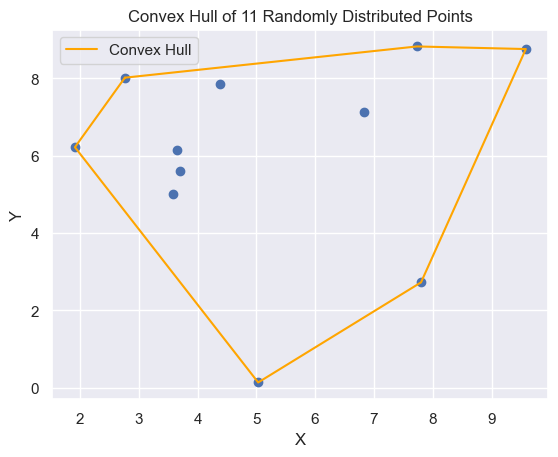

In [44]:
SeeImplementation(num_samples = 11, random_seed = 1234)

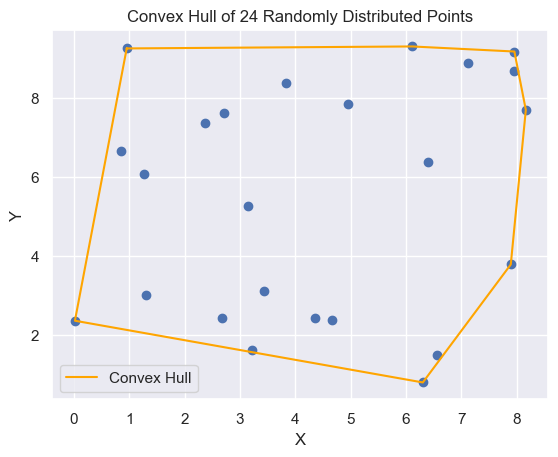

In [45]:
SeeImplementation(num_samples = 24, random_seed = 1111)

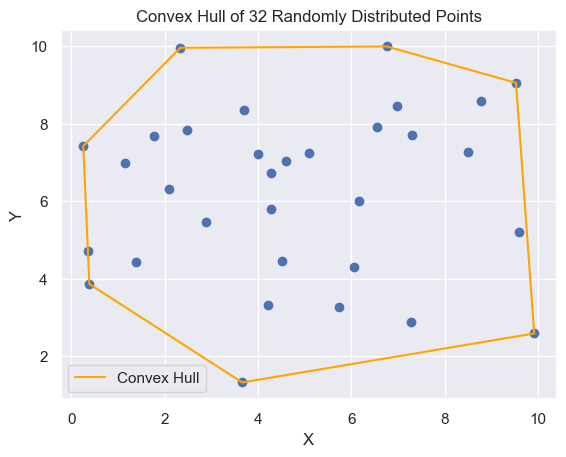

In [46]:
SeeImplementation(num_samples = 32, random_seed = 2222)

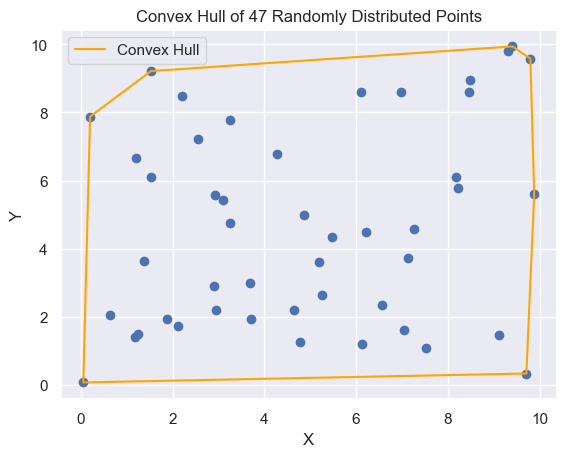

In [47]:
SeeImplementation(num_samples = 47, random_seed = 3333)

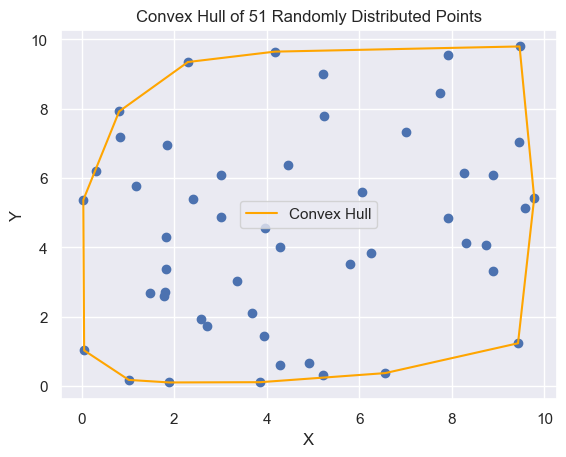

In [48]:
SeeImplementation(num_samples = 51, random_seed = 4444)

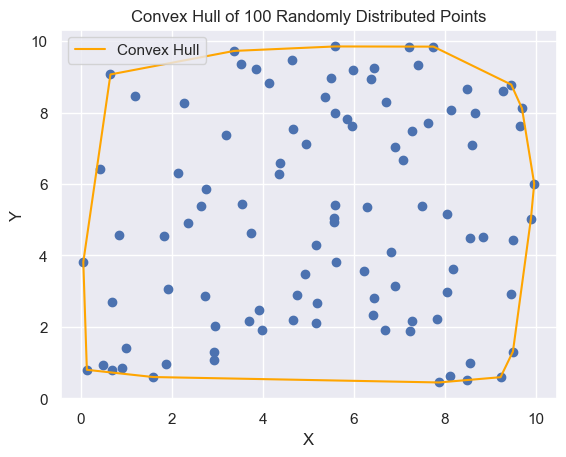

In [49]:
SeeImplementation(num_samples = 100, random_seed = 5555)

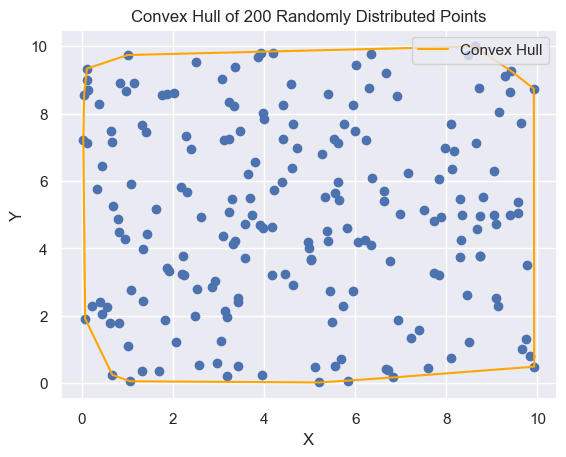

In [50]:
SeeImplementation(num_samples = 200, random_seed = 6666)

# References

[1] https://jayjingyuliu.wordpress.com/2018/01/24/algorithm-two-finger-convex-hull-merging-algorithm/